In [69]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression


In [70]:
raw_data = pd.read_csv(r'C:\Users\gowth\Downloads\uow docs\1.04.+Real-life+example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [71]:
raw_data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [72]:
data =raw_data.drop(['Model'],axis = 1)

In [73]:
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [74]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [75]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [76]:
data_no_mv = data.dropna(axis = 0)

In [77]:
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


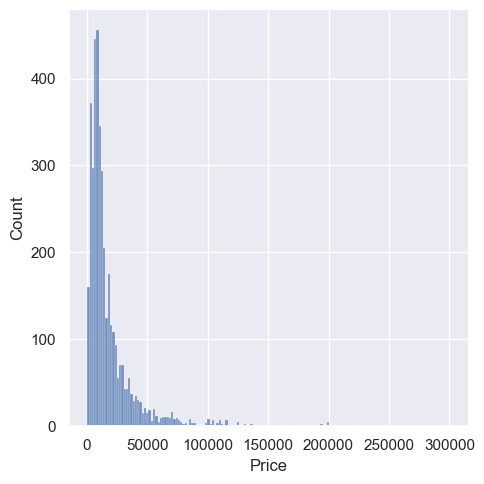

In [78]:
sns.displot(data_no_mv['Price'])

In [79]:
q = data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = "all")


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


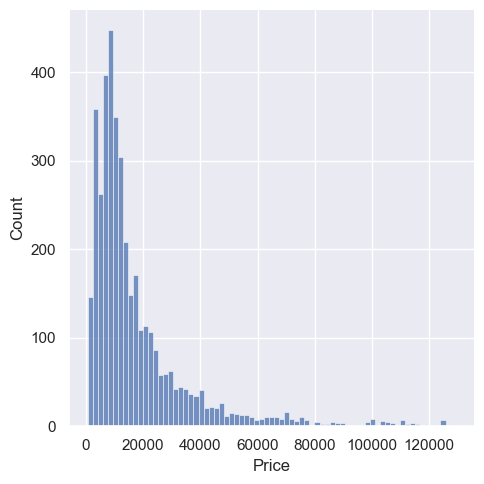

In [80]:
sns.displot(data_1['Price'])

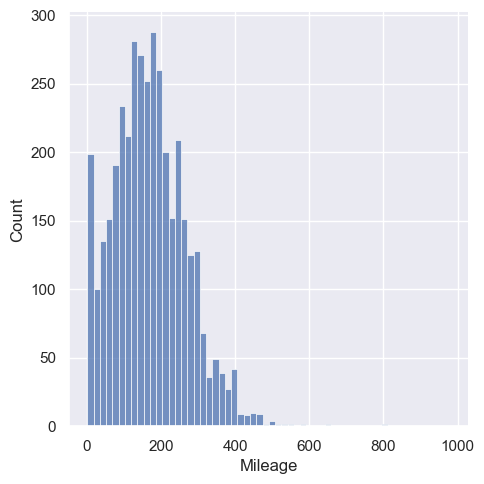

In [81]:
q = data_1["Mileage"].quantile(0.01)
data_2 = data_1[data_1['Mileage']>q]
sns.displot(data_2['Mileage'])

In [82]:
data_3 = data_2[data_2["EngineV"]<6.5]

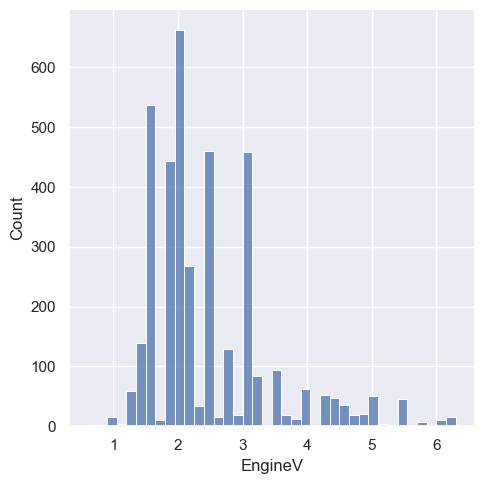

In [83]:
sns.displot(data_3["EngineV"])

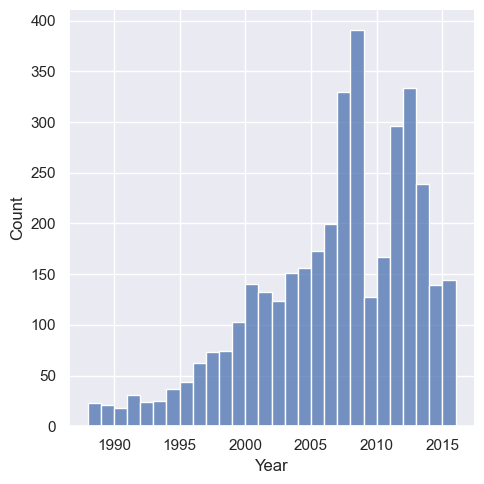

In [84]:
s = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"]>s]
sns.displot(data_4["Year"])

In [85]:
data_cleaned = data_4.reset_index(drop=True)

In [86]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3777,3777.000000,3777,3777.000000,3777.000000,3777,3777,3777.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,835,NaN,1453,NaN,NaN,1744,3412,NaN
mean,NaN,16658.270143,NaN,169.668785,2.452010,NaN,NaN,2006.307652
std,NaN,16512.284682,NaN,99.461592,0.953121,NaN,NaN,6.034297
min,NaN,800.000000,NaN,1.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,99.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11200.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20300.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


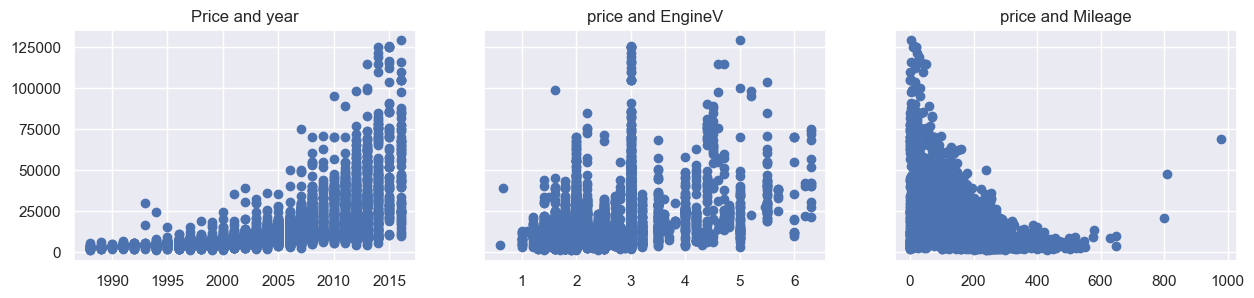

In [87]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned["Price"])
ax1.set_title("Price and year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("price and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax3.set_title("price and Mileage")


plt.show()

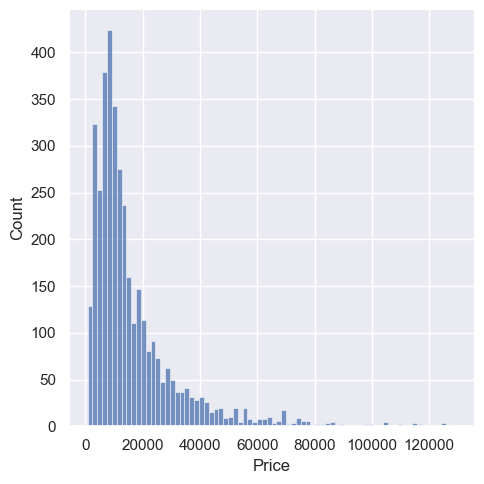

In [88]:
sns.displot(data_cleaned["Price"])

In [89]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"]=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3772,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3773,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3774,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3775,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


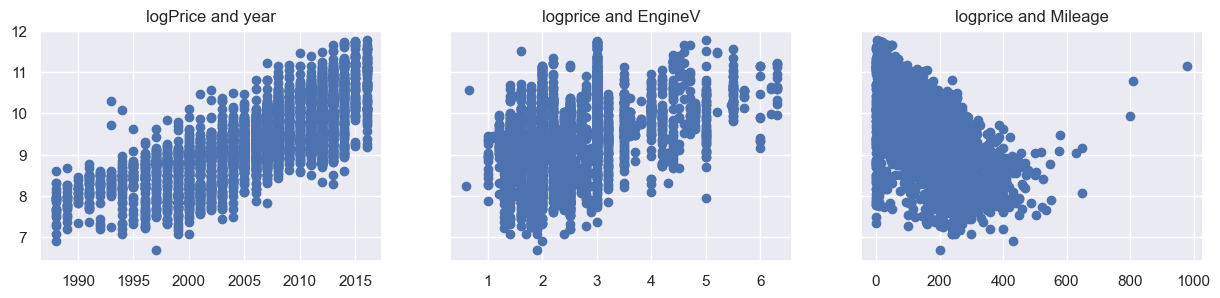

In [90]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["log_price"])
ax1.set_title("logPrice and year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
ax2.set_title("logprice and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["log_price"])
ax3.set_title("logprice and Mileage")

plt.show()


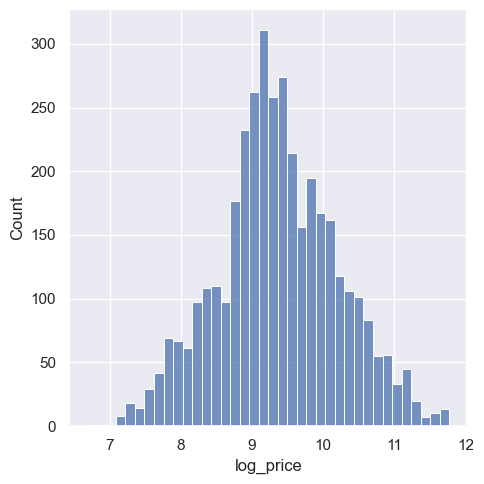

In [91]:
sns.displot(data_cleaned["log_price"])

In [92]:
data_cleaned = data_cleaned.drop(['Price'],axis = 1)

In [95]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns

In [99]:
vif

,VIF,features
0,3.884091,Mileage
1,10.446728,Year
2,7.618336,EngineV


In [101]:
data_no_multicollinearity = data_cleaned.drop(["Year"],axis = 1)

In [102]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first = True)

In [103]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [104]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [105]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [106]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [107]:
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"],axis = 1)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [114]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets,train_size = 0.8,random_state =365)

In [115]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [116]:
y_hat = reg.predict(x_train)

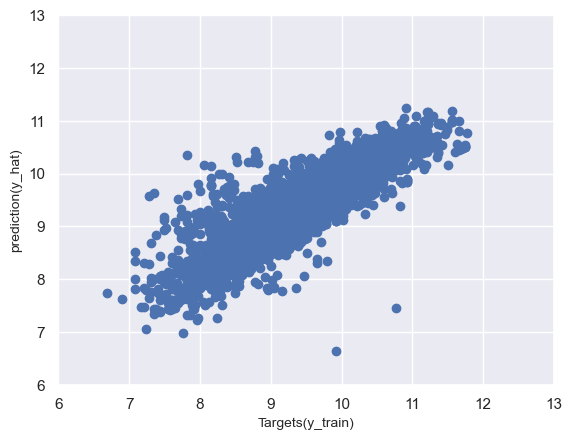

In [119]:
plt.scatter(y_train,y_hat)
plt.xlabel("Targets(y_train)",size = 10)
plt.ylabel("prediction(y_hat)",size = 10)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


C:\Users\gowth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

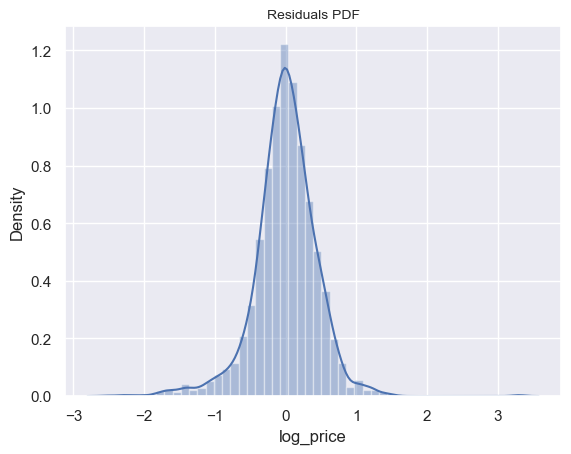

In [121]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF',size = 10)

In [122]:
reg.score(x_train,y_train)

0.7237564500748759

In [123]:
reg.intercept_

9.36711535283573

In [124]:
reg.coef_

array([-0.4178575 ,  0.22380129,  0.02289407,  0.00757664, -0.12867838,
       -0.17162698, -0.04217692, -0.06905333, -0.13734013, -0.08441777,
       -0.18929054, -0.12670086, -0.1662898 , -0.12951456, -0.02779987,
       -0.14969086,  0.32967657])

In [128]:
reg_summary = pd.DataFrame(inputs.columns.values,columns = ["Features"])
reg_summary["weights"]= reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.417858
1,EngineV,0.223801
2,Brand_BMW,0.022894
3,Brand_Mercedes-Benz,0.007577
4,Brand_Mitsubishi,-0.128678
5,Brand_Renault,-0.171627
6,Brand_Toyota,-0.042177
7,Brand_Volkswagen,-0.069053
8,Body_hatch,-0.137340
9,Body_other,-0.084418


In [129]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [130]:
y_hat_test = reg.predict(x_test)


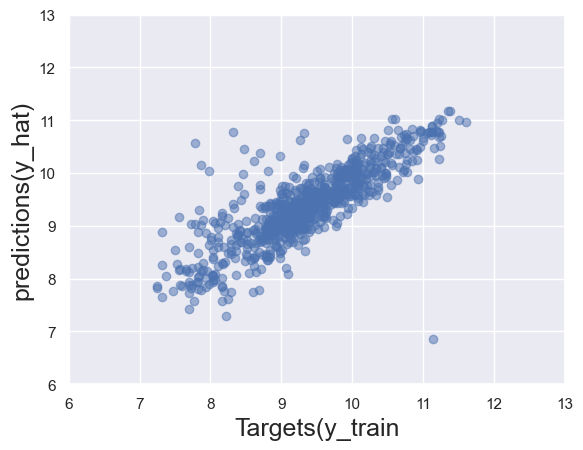

In [137]:
plt.scatter(y_test,y_hat_test,alpha =0.5)
plt.xlabel('Targets(y_train',size = 18)
plt.ylabel("predictions(y_hat)",size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [141]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ["Predictions"])
df_pf.head()

,Predictions
0,47811.668144
1,32906.794797
2,9041.488088
3,17287.193937
4,11969.339525


In [143]:
df_pf["Target"]= np.exp(y_test)
df_pf

,Predictions,Target
0,47811.668144,NaN
1,32906.794797,7900.0
2,9041.488088,NaN
3,17287.193937,NaN
4,11969.339525,NaN
...,...,...
751,19446.702473,NaN
752,9484.772811,8900.0
753,3129.238670,NaN
754,7657.594174,NaN


In [145]:
y_test = y_test.reset_index(drop=True )
y_test.head()

0     8.318742
1    10.434116
2     8.922658
3    10.038892
4     9.195227
Name: log_price, dtype: float64

In [146]:
df_pf["Target"]= np.exp(y_test)
df_pf

,Predictions,Target
0,47811.668144,4100.0
1,32906.794797,34000.0
2,9041.488088,7500.0
3,17287.193937,22900.0
4,11969.339525,9850.0
...,...,...
751,19446.702473,22500.0
752,9484.772811,11499.0
753,3129.238670,1600.0
754,7657.594174,8200.0


In [147]:
df_pf['Residual']=df_pf['Target'] - df_pf['Predictions']

In [148]:
df_pf["difference%"] = np.absolute(df_pf['Residual']/df_pf["Target"]*100)
df_pf

,Predictions,Target,Residual,difference%
0,47811.668144,4100.0,-43711.668144,1066.138247
1,32906.794797,34000.0,1093.205203,3.215309
2,9041.488088,7500.0,-1541.488088,20.553175
3,17287.193937,22900.0,5612.806063,24.510070
4,11969.339525,9850.0,-2119.339525,21.516137
...,...,...,...,...
751,19446.702473,22500.0,3053.297527,13.570211
752,9484.772811,11499.0,2014.227189,17.516542
753,3129.238670,1600.0,-1529.238670,95.577417
754,7657.594174,8200.0,542.405826,6.614705


In [149]:
df_pf.describe()

,Predictions,Target,Residual,difference%
count,756.000000,756.000000,756.000000,756.000000
mean,15286.063982,16338.256918,1052.192936,42.825706
std,11761.122806,15719.501132,8612.822376,94.535204
min,949.449918,1400.000000,-43711.668144,0.112926
25%,7592.949079,6900.000000,-2289.854110,11.561712
50%,11916.514649,11000.000000,25.546878,23.451199
75%,19485.748822,20125.000000,3055.063214,40.969863
max,71407.899409,109999.000000,67750.550082,1525.989737


In [151]:
df_pf.sort_values(by = ["difference%"])

,Predictions,Target,Residual,difference%
221,20476.850230,20500.0,23.149770,0.112926
347,10011.725326,9999.0,-12.725326,0.127266
593,37549.390472,37500.0,-49.390472,0.131708
743,17872.056014,17900.0,27.943986,0.156112
358,20538.054285,20500.0,-38.054285,0.185631
...,...,...,...,...
313,35028.139167,4800.0,-30228.139167,629.752899
711,22833.246153,2900.0,-19933.246153,687.353316
703,25626.549695,2600.0,-23026.549695,885.636527
0,47811.668144,4100.0,-43711.668144,1066.138247


In [152]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x: '%.2f' % x)
df_pf.sort_values(by=["difference%"])

,Predictions,Target,Residual,difference%
221,20476.85,20500.00,23.15,0.11
347,10011.73,9999.00,-12.73,0.13
593,37549.39,37500.00,-49.39,0.13
743,17872.06,17900.00,27.94,0.16
358,20538.05,20500.00,-38.05,0.19
87,9327.61,9300.00,-27.61,0.30
260,7928.05,7900.00,-28.05,0.36
333,8434.80,8400.00,-34.80,0.41
262,25879.79,25999.00,119.21,0.46
710,10437.27,10500.00,62.73,0.60
